In [ ]:
print("Heart Disease Prediction")

Heart Disease Prediction


In [5]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sns
from matplotlib import pyplot

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

In [7]:
df = pd.read_csv("/content/heart_v2.csv")
df.head(3)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1


In [8]:
df.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [10]:
df.describe()


,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [11]:
df['heart disease'].value_counts()


,count
heart disease,
0,150
1,120


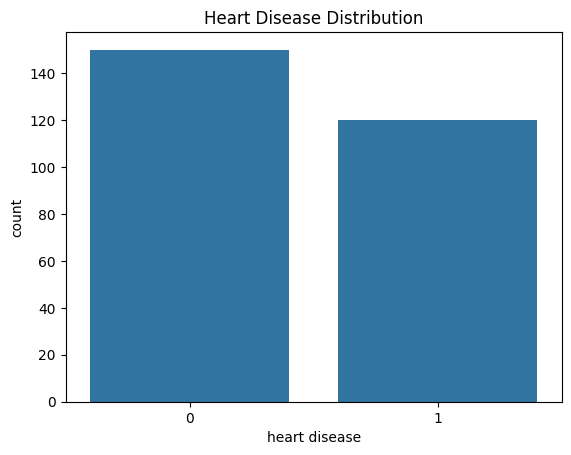

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heart disease distribution
sns.countplot(x='heart disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()


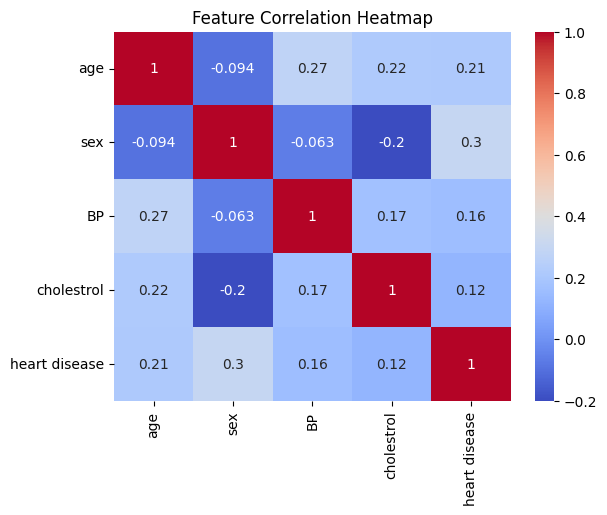

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [14]:
df.select_dtypes(include=['object']).columns


Index([], dtype='object')

In [15]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.6851851851851852
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.61      0.52      0.56        21

    accuracy                           0.69        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.68      0.69      0.68        54



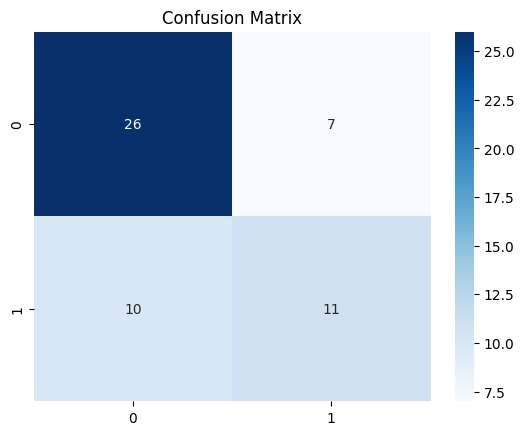

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.6111111111111112
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.50      0.57      0.53        21

    accuracy                           0.61        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.62      0.61      0.61        54



In [21]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.6481481481481481
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        33
           1       0.56      0.48      0.51        21

    accuracy                           0.65        54
   macro avg       0.62      0.62      0.62        54
weighted avg       0.64      0.65      0.64        54



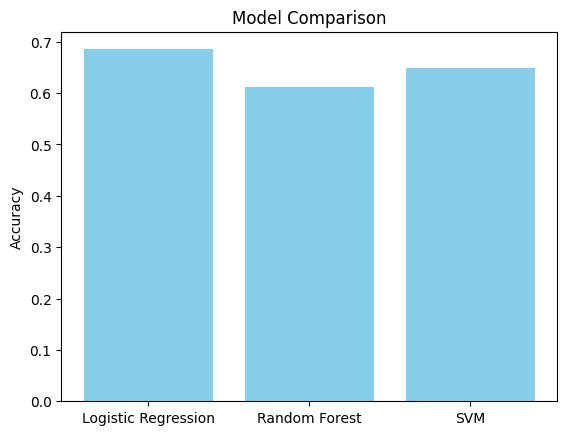

In [22]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]

plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [23]:
import joblib

joblib.dump(rf_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [27]:
new_patient = [[70	,1,	130,	322]]
new_prediction = rf_model.predict(scaler.transform(new_patient))
print("Prediction:", new_prediction)


Prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
